<a href="https://colab.research.google.com/github/prajwalr96/TenserFlow_Learning/blob/master/Image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Computer Vision Neural Network example



In [5]:
import tensorflow as tf
print(tf.__version__)

2.4.0


In [7]:
mnist = tf.keras.datasets.fashion_mnist

In [8]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

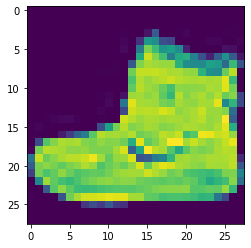

In [13]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

In [14]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [15]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [16]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6243 - accuracy: 0.7857
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3838 - accuracy: 0.8623
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3357 - accuracy: 0.8783
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3139 - accuracy: 0.8853
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2969 - accuracy: 0.8908


In [17]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3382 - accuracy: 0.8790


[0.3382081091403961, 0.8790000081062317]

In [33]:
classifications = model.predict(test_images)

print(classifications[2])

[5.6531434e-07 9.9999940e-01 2.7066907e-08 2.9774393e-08 2.4039759e-08 4.9578099e-13 2.0602278e-10 2.5569353e-12 2.4594779e-12 2.6528452e-12]


1


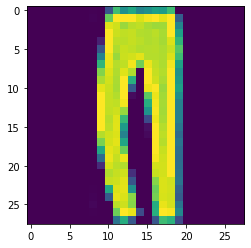

In [34]:
print(test_labels[2])
plt.imshow(test_images[2])


# Different dense value layers and callbacks
---



In [44]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.3):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

In [45]:
callbacks = myCallback()
model1 = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model1.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

model1.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

model1.evaluate(test_images, test_labels)

classifications1 = model1.predict(test_images)

print(classifications1[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.5810 - accuracy: 0.7938
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3597 - accuracy: 0.8687
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3227 - accuracy: 0.8813
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2955 - accuracy: 0.8902

Reached 60% accuracy so cancelling training!
313/313 [==============================] - 1s 3ms/step - loss: 0.3544 - accuracy: 0.8745
[8.0773515e-07 4.9879954e-09 6.2014742e-08 8.7541876e-09 1.3692286e-07 6.4229169e-03 7.2742765e-08 4.8349950e-02 3.2875104e-07 9.4522572e-01]
9
